In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve,auc
)

import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [7]:
X_train = joblib.load("../data/processed_data/X_train.pkl")
X_test = joblib.load("../data/processed_data/X_test.pkl")
y_train = joblib.load("../data/processed_data/Y_train.pkl")
y_test = joblib.load("../data/processed_data/Y_test.pkl")


In [8]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200,random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss',random_state=42)
}

In [9]:
results={}

In [14]:
for name,model in models.items():
    print(f"Training : {name}")
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:,1]
    results[name]={
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_pred_proba)
    }

results_df = pd.DataFrame(results).T
print("Model Performance Summary :")
display(results_df)

Training : Logistic Regression
Training : Random Forest
Training : XGBoost


/Users/akhandchaurasia/credit_card_fraud_detection/venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [19:22:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model Performance Summary :


,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Logistic Regression,0.947728,0.974150,0.919865,0.946230,0.989366
Random Forest,0.999894,0.999789,1.000000,0.999894,1.000000
XGBoost,0.999666,0.999332,1.000000,0.999666,0.999995


# Confusion Matrix for best Model

Best Model based on ROC_AUC is Random Forest


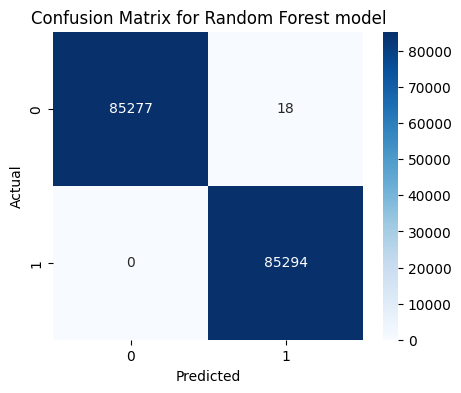

In [21]:
best_model_name = results_df['ROC-AUC'].idxmax()
print(f"Best Model based on ROC_AUC is {best_model_name}")

best_model = models[best_model_name]
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'Blues')
plt.title(f"Confusion Matrix for {best_model_name} model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report

In [26]:
print("Classification Report")
print(classification_report(y_pred,y_test))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85277
           1       1.00      1.00      1.00     85312

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



# ROC Curve

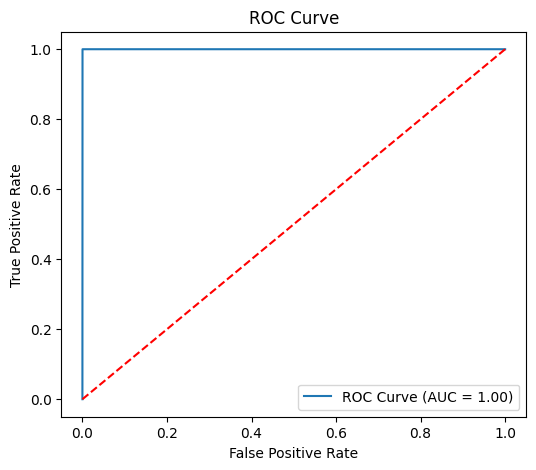

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Important Features

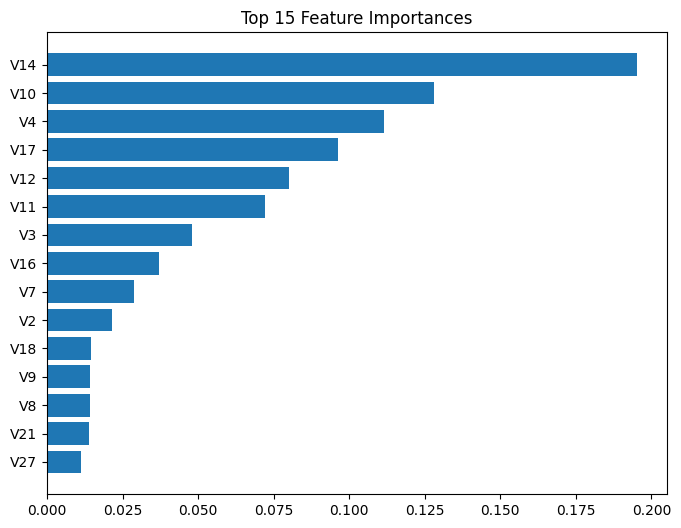

In [32]:
try:
    importances = best_model.feature_importances_
    features = X_test.columns
    sorted_idx = importances.argsort()[::-1]
    plt.figure(figsize=(8,6))
    plt.barh(features[sorted_idx][:15], importances[sorted_idx][:15])
    plt.title("Top 15 Feature Importances")
    plt.gca().invert_yaxis()
    plt.show()
except AttributeError:
    print("Feature importance not available for this model.")

In [25]:
joblib.dump(best_model, f"../models/{best_model_name.replace(' ','_').lower()}_model.pkl")
print("Model Saved Succesfullly")

Model Saved Succesfullly
